<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

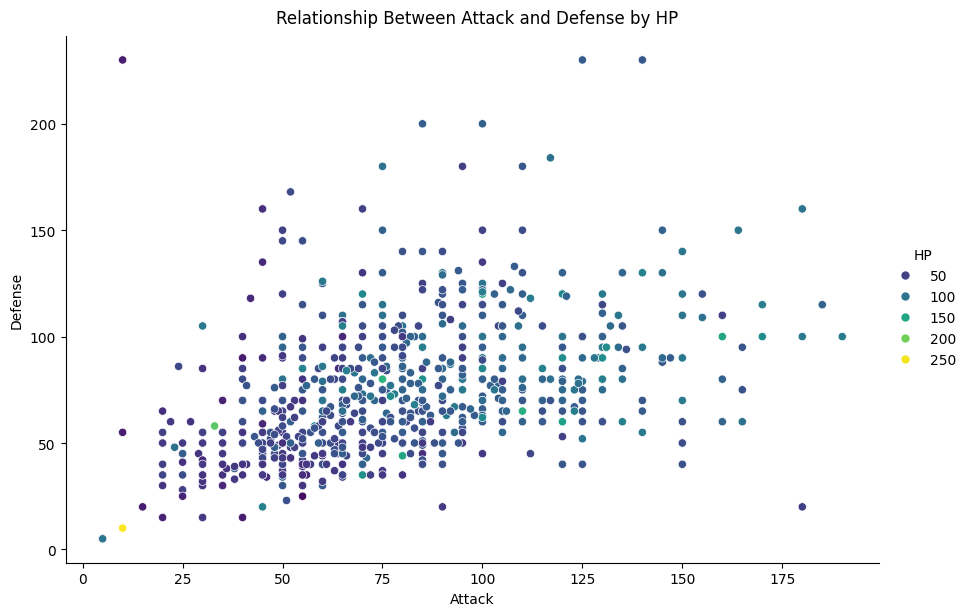

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv'
df = pd.read_csv(url)

# Fill missing values in 'Type 2' with 'None'
df['Type 2'] = df['Type 2'].fillna('None')

# Create a scatter plot using seaborn's relplot
g = sns.relplot(
    x='Attack',
    y='Defense',
    hue='HP',
    data=df,
    palette='viridis',
    kind='scatter',
    height=6,
    aspect=1.5
)

# Add a title to the plot
g.fig.suptitle('Relationship Between Attack and Defense by HP', y=1.02)

plt.show()


From the plot, I observed that Pokémon with higher Attack values tend not to have proportionally high Defense values, and vice versa. The distribution appears to be somewhat scattered rather than forming a clear, direct correlation. Additionally, we can observe that the HP (as indicated by the color hue) is relatively evenly spread across various combinations of Attack and Defense. While some Pokémon with higher Defense may have moderate to high HP, there isn’t a simple linear relationship. Instead, the relationship between these combat statistics appears more complex and influenced by multiple underlying attributes.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

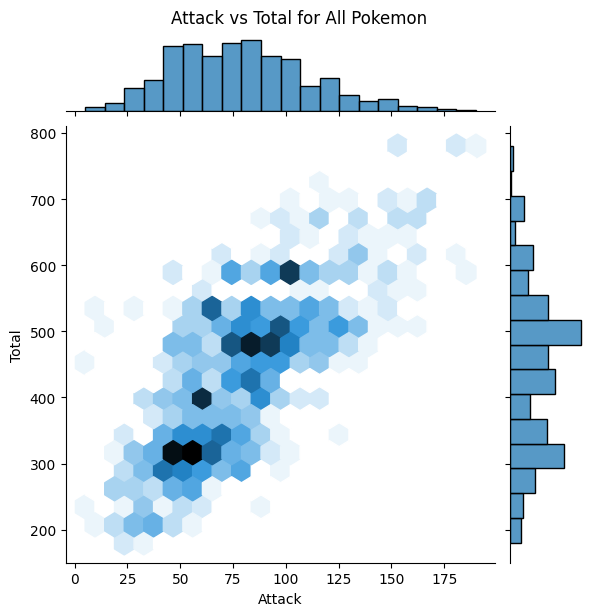

In [4]:
# Fill missing values in 'Type 2' with 'None' if needed
df['Type 2'] = df['Type 2'].fillna('None')

# Create a hexbin plot using seaborn's jointplot
g = sns.jointplot(x='Attack', y='Total', data=df, kind='hex', gridsize=20)

# Add a title to the plot
g.fig.suptitle('Attack vs Total for All Pokemon', y=1.02)

plt.show()


From the plot, I observed that the hexbin plot not only displays the relationship between Attack and Total but also shows the density distribution of the data points. Areas with darker shades and more hexagonal bins indicate regions where more Pokémon share similar Attack and Total values, helping us identify clusters or concentrations of Pokémon within certain ranges of these stats.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

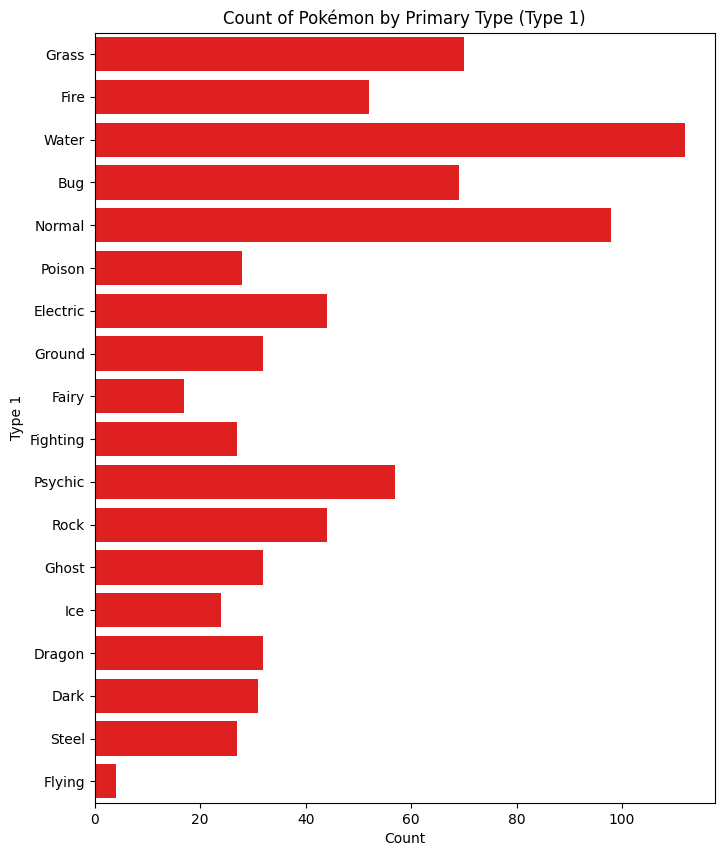

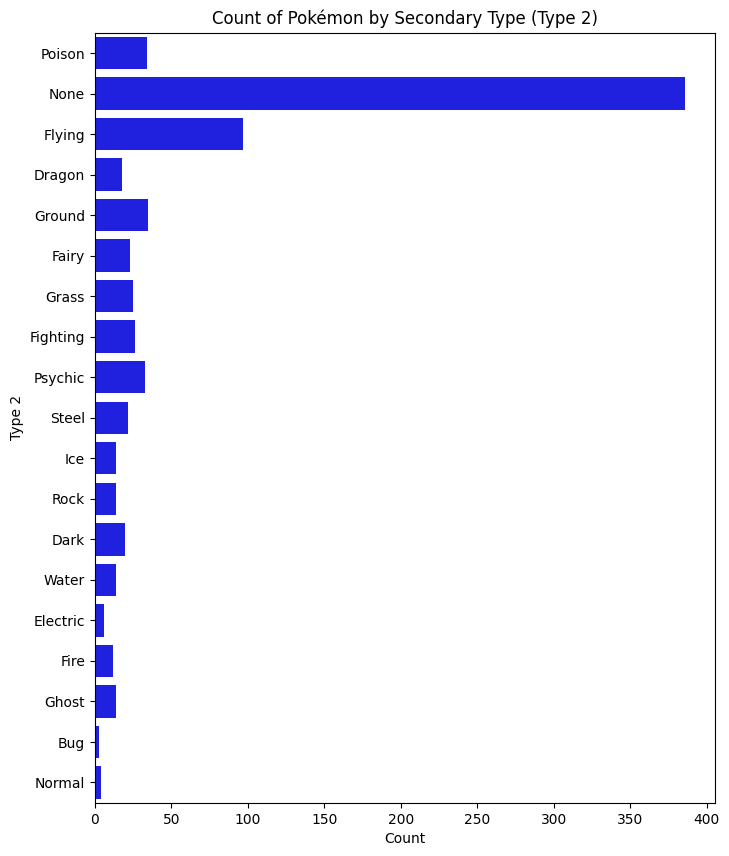

In [5]:
# Fill missing values in 'Type 2' with 'None' if needed
df['Type 2'] = df['Type 2'].fillna('None')

# Create the Type 1 count plot
plt.figure(figsize=(8, 10))
sns.countplot(y='Type 1', data=df, color='red')
plt.title('Count of Pokémon by Primary Type (Type 1)')
plt.xlabel('Count')
plt.ylabel('Type 1')
plt.show()

# Create the Type 2 count plot
plt.figure(figsize=(8, 10))
sns.countplot(y='Type 2', data=df, color='blue')
plt.title('Count of Pokémon by Secondary Type (Type 2)')
plt.xlabel('Count')
plt.ylabel('Type 2')
plt.show()


### Ans:
From the plot, I observed that the most common primary (Type 1) Pokémon types tend to be Water and Normal, making them appear at the top of the distribution with the highest counts. For secondary (Type 2) types, Flying and Poison are among the most frequent. Conversely, types like Ice, Ghost, and Dragon appear more rarely as Type 1, and some types occur sparingly as Type 2. This suggests that certain elemental types are more commonly assigned to a broader range of Pokémon, while others remain relatively rare.